In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy import stats

In [3]:
#The command that informs me of the file path to the dataset.
pwd


NameError: name 'pwd' is not defined

In [4]:
#Importing Data Set from laptop repsository.

drug_deaths = pd.read_csv('/Users/lindasegalini/Desktop/Data Sets/Accidental_Drug_Related_Deaths_2012-2018 (1).csv')

In [5]:
#Making a copy of the dataset.

x =drug_deaths.copy()


In [6]:
#Preview the DataSet.

x.head()


,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,6/28/14 0:00,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,3/21/13 0:00,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,3/13/16 0:00,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,3/31/16 0:00,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,2/13/13 0:00,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [7]:
x.shape
# The dataset is 5105 rows and 41 columns.

(5105, 41)

In [7]:
#identify na values within columns
x.isna().sum(axis=0)

ID                        0
Date                      2
DateType                  2
Age                       3
Sex                       6
Race                     13
ResidenceCity           173
ResidenceCounty         797
ResidenceState         1549
DeathCity                 5
DeathCounty            1100
Location                 24
LocationifOther        4515
DescriptionofInjury     780
InjuryPlace              66
InjuryCity             1756
InjuryCounty           2741
InjuryState            3681
COD                       0
OtherSignifican        4936
Heroin                 2576
Cocaine                3584
Fentanyl               2873
FentanylAnalogue       4716
Oxycodone              4498
Oxymorphone            4997
Ethanol                3858
Hydrocodone            4987
Benzodiazepine         3762
Methadone              4631
Amphet                 4946
Tramad                 4975
Morphine_NotHeroin     5063
Hydromorphone          5080
Other                  4670
OpiateNOS           

In [8]:
#Dropping irrelivant columns .
x.drop(['ID','DateType','ResidenceCity','ResidenceCounty','MannerofDeath','DeathCityGeo','ResidenceCityGeo','InjuryCityGeo', 'COD','Other'], axis =1)

,Date,Age,Sex,Race,ResidenceState,DeathCity,DeathCounty,Location,LocationifOther,DescriptionofInjury,...,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid
0,6/28/14 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,substance,...,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/21/13 0:00,48.0,Male,Black,NaN,NORWALK,FAIRFIELD,Hospital,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/13/16 0:00,30.0,Female,White,CT,DANBURY,NaN,Hospital,NaN,Substance Abuse,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
3,3/31/16 0:00,23.0,Male,White,NY,GREENWICH,NaN,Hospital,NaN,substance abuse,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
4,2/13/13 0:00,22.0,Male,"Asian, Other",NaN,GREENWICH,FAIRFIELD,Hospital,NaN,Transdermal Absorption,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6/29/14 0:00,23.0,Male,White,NaN,BRISTOL,HARTFORD,Residence,NaN,Inhalation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8/12/12 0:00,21.0,Female,White,NaN,WEST HARTFORD,HARTFORD,Residence,NaN,Used Heroin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,11/10/13 0:00,40.0,Female,White,NaN,NEW HAVEN,NEW HAVEN,Hospital,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4/25/12 0:00,40.0,Male,White,NaN,EAST HARTFORD,HARTFORD,Residence,NaN,Used Heroin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5/15/13 0:00,50.0,Male,White,NaN,MONTVILLE,NEW LONDON,Residence,NaN,Ingestion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Idenitfy and remove duplicates 
x.drop_duplicates(keep="first", inplace=True)
#There where no duplicate values?


In [10]:
#After the Scrubbing, the shape remains the same , even though I dropped the columns. 
x.shape

(5105, 41)

In [11]:
#Compairing Gender and age.

pd.crosstab(x.Sex, x.Age, margins =True)

#Females are less than 1/2 as likely to die of accidental drug use.

Age,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,...,70.0,71.0,72.0,73.0,74.0,75.0,81.0,84.0,87.0,All
Sex,,,,,,,,,,,,,,,,,,,,,
Female,1,0,0,6,1,11,11,19,21,20,...,2,2,7,0,0,1,1,0,0,1325
Male,0,1,1,4,12,15,28,34,51,62,...,5,8,3,4,1,2,0,1,1,3773
Unknown,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
All,1,1,1,10,13,26,39,53,72,82,...,7,10,10,4,1,3,1,1,1,5099


In [12]:
#Creating variables of some drugs counts  
print("Herion Tally")

HeroinTally = x.Heroin.count()

print(HeroinTally)

CocTally = x.Cocaine.count()
print("Cocaine Tally")
print(CocTally)

AmphetTally = x.Amphet.count()
print("Meth talley")
print(AmphetTally)



Herion Tally
2529
Cocaine Tally
1521
Meth talley
159


In [13]:
#Crosstab of Herion use and Gender
pd.crosstab(x.Sex, CocTally, margins =True)

col_0,1521,All
Sex,,
Female,1325,1325
Male,3773,3773
Unknown,1,1
All,5099,5099


In [14]:
#Getting the count of all attributes associated with Black Americans.
# 433 identified as Black, 
#Cocaine use amounst the black population is 235 / 433 = 0.54 %
# 192 for AnyOpiate = 44%
#Benzodiazine =11%
#Methadone = 05%
#Fetnayl = 42%
#Ethanol = 29%


x[x['Race'] == 'Black'].count()



ID                     433
Date                   433
DateType               433
Age                    433
Sex                    433
Race                   433
ResidenceCity          416
ResidenceCounty        379
ResidenceState         309
DeathCity              432
DeathCounty            336
Location               430
LocationifOther         52
DescriptionofInjury    379
InjuryPlace            423
InjuryCity             288
InjuryCounty           199
InjuryState            101
COD                    433
OtherSignifican         20
Heroin                 165
Cocaine                235
Fentanyl               182
FentanylAnalogue        41
Oxycodone               35
Oxymorphone              1
Ethanol                126
Hydrocodone              5
Benzodiazepine          48
Methadone               24
Amphet                   8
Tramad                  11
Morphine_NotHeroin       1
Hydromorphone            1
Other                   43
OpiateNOS                2
AnyOpioid              192
M

In [15]:
#4004 Identified as white 
x[x["Race"] == 'White'].count()

#Cocaine 26%
#Benzodiazipine 29%
#Methadone = 02%
#AnyOpiate = 48%
#Herione = 50%
#Fetanyl = 43%
# Ethanol = 24%

ID                     4004
Date                   4003
DateType               4003
Age                    4004
Sex                    4002
Race                   4004
ResidenceCity          3894
ResidenceCounty        3377
ResidenceState         2781
DeathCity              4003
DeathCounty            3148
Location               3988
LocationifOther         455
DescriptionofInjury    3376
InjuryPlace            3960
InjuryCity             2613
InjuryCounty           1849
InjuryState            1146
COD                    4004
OtherSignifican         132
Heroin                 2006
Cocaine                1047
Fentanyl               1729
FentanylAnalogue        290
Oxycodone               516
Oxymorphone             100
Ethanol                 973
Hydrocodone             102
Benzodiazepine         1183
Methadone               394
Amphet                  139
Tramad                  102
Morphine_NotHeroin       41
Hydromorphone            23
Other                   347
OpiateNOS           

In [16]:
x.Race.unique()

array([nan, 'Black', 'White', 'Asian, Other', 'Hispanic, White',
       'Asian Indian', 'Hispanic, Black', 'Unknown', 'Other', 'Chinese',
       'Native American, Other', 'Hawaiian'], dtype=object)

In [17]:
x[x.Race =="Hispanic, White"].count()

#Fetnayl = 47%
#Heroin = 54%
#Cocaine = 36%


ID                     561
Date                   561
DateType               561
Age                    561
Sex                    560
Race                   561
ResidenceCity          526
ResidenceCounty        466
ResidenceState         390
DeathCity              561
DeathCounty            441
Location               559
LocationifOther         71
DescriptionofInjury    477
InjuryPlace            552
InjuryCity             370
InjuryCounty           261
InjuryState            148
COD                    561
OtherSignifican         12
Heroin                 308
Cocaine                204
Fentanyl               266
FentanylAnalogue        48
Oxycodone               47
Oxymorphone              4
Ethanol                119
Hydrocodone              7
Benzodiazepine          92
Methadone               53
Amphet                   9
Tramad                  11
Morphine_NotHeroin       0
Hydromorphone            0
Other                   40
OpiateNOS               12
AnyOpioid              286
M

In [20]:
x.InjuryState.unique()

array([nan, 'CT', 'NY', 'CONNECTICUT'], dtype=object)

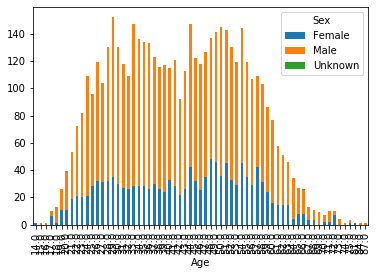

In [18]:
#Now compairing unnormalized data, compairing Age and Sex with overdose death.

crosstab_01 = pd.crosstab(x.Age, x.Sex)
crosstab_01.plot(kind ='bar',stacked =True)

#Wow! If you are a female above the age of 30, you are at a higher chance to overdose vise > 30 yrs old. 

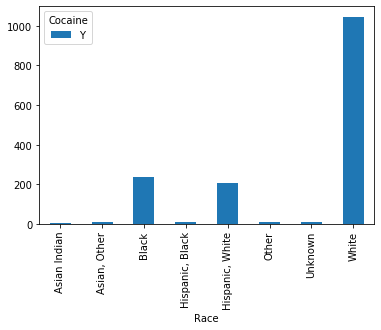

In [19]:
#Now compairing unnormalized data, compairing Race and Age with overdose death.

crosstab_01 = pd.crosstab(x.Race, x.Cocaine)

crosstab_01.plot(kind ='bar',stacked =True)

In [23]:
#Standardizing the Age of the deaths.

from scipy import stats

x['age_z'] =stats.zscore(x.Age)

#verify

x.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo,age_z
0,14-0273,6/28/14 0:00,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)",NaN
1,13-0102,3/21/13 0:00,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)",NaN
2,16-0165,3/13/16 0:00,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN,NaN
3,16-0208,3/31/16 0:00,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN,NaN
4,13-0052,2/13/13 0:00,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)",NaN


In [24]:
#using the query() against the 'age' column in order to find all outliers and have them identified in a new column.
#A z of 3 will be the determining factor of the query.

Age_outliers = x.query('age_z >3 |age_z < -3')

In [26]:
#Now create a column of sorted age_z variables.
Age_sort = x.sort_values(['age_z'], ascending = False)

In [27]:
#Now printing out the largest of the age_z values.
x.age_z.head(n=10)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: age_z, dtype: float64